# Kuramoto–Sivashinsky equation

In [37]:
import triflow as trf
import scipy.signal as spsig
import numpy as np
import pylab as pl
from skimage.filters import sobel

pl.style.use("publication")
%matplotlib inline

In [2]:
model = trf.Model("-dxxzeta - dxxxxzeta + (dxzeta)**2", "zeta")

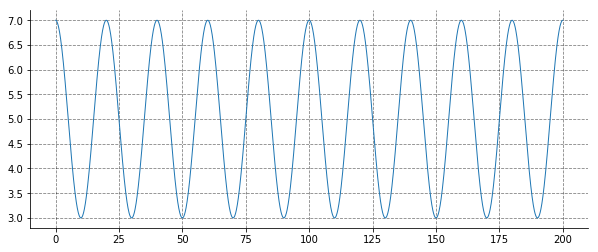

In [23]:
x = np.linspace(0, 200, 2010)
noise = np.random.randn(x.size) * 3E-1 * 0
zeta = np.cos(x * 2 * np.pi / x.max() * 10) * 2 + 5 + noise

pl.figure(figsize=(10, 4))
pl.plot(x, zeta)
pl.show()

In [27]:
def zeta_mean(simul):
    simul.fields["zeta_mean"] = "x", simul.fields.zeta - simul.fields.zeta.mean("x")
    return simul

In [28]:
simul = trf.Simulation(model, fields=model.fields_template(x=x, zeta=zeta),
                   dt=.2, tmax=200, tol=5E-0, parameters=dict(periodic=True))
simul.add_post_process("compute_zeta_mean", zeta_mean)
container = simul.attach_container()
curve = trf.display_fields(simul)
curve.hv_curve.redim.range(zeta=(0, None))

:Layout
   .Curve.I  :DynamicMap   []
      :Curve   [x]   (zeta)
   .Curve.II :DynamicMap   []
      :Curve   [x]   (zeta_mean)

In [29]:
results = simul.run()

In [30]:
data = (simul.container.data.zeta - simul.container.data.zeta.mean("x")).T.values

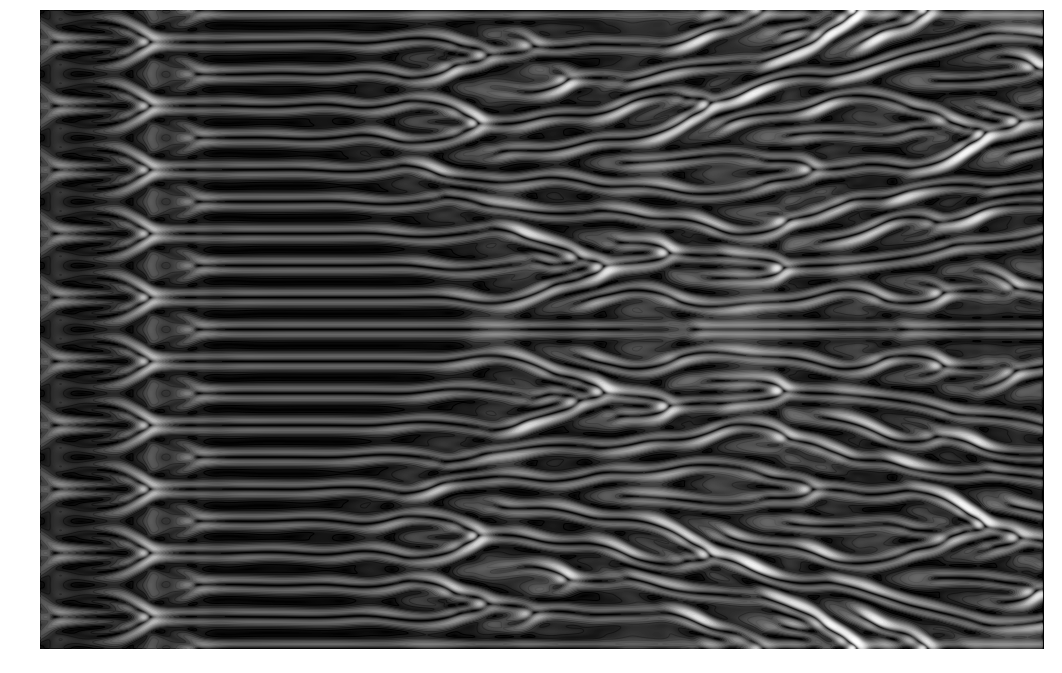

In [38]:
fig = pl.figure(figsize=(18, 18 / (1568 / 1024)))
pl.pcolormesh(filt(data), cmap="Greys_r")
pl.contour(filt(data), 20, cmap="Greys_r")
pl.grid(False)
pl.axis('off')
pl.savefig("../../source_doc/source/_static/images/bg.jpg", bbox_inches='tight')

In [36]:
!convert ../../source_doc/source/_static/images/bg.jpg ../../source_doc/source/_static/images/bg.png